In [15]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import urllib.request
import os
from  selenium.webdriver.common.by import By

In [16]:
def set_chrome_driver():
    chrome_options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
    return driver


def createDirectory(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Error: Failed to create the directory.")

In [55]:
def crawling_img(val):
    driver = webdriver.Chrome('./chromedriver')
    driver.get("https://www.google.co.kr/imghp?hl=ko&tab=wi&authuser=0&ogbl")
    driver.execute_script("document.querySelector('input').value = '" + val + "'")  # 검색창에 검색어 입력
    driver.execute_script("document.querySelector('form').submit()")  # 검색 요청 (검색 폼 제출)

    # 스크롤 끝까지 내려 검색결과 더 보기
    # 테스트를 빨리 하려고 스크롤 안 내린다. 이 부분 주석처리를 풀면 스크롤을 끝까지 내린다.
    SCROLL_PAUSE_TIME = 1
    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")  # 페이지의 세로길이
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  # 브라우저 끝까지 스크롤을 내림
        time.sleep(SCROLL_PAUSE_TIME)  # 추가 검색결과가 뜰 동안 기다린다
        # 페이지의 세로길이가 기존과 비교해서 더 길어지지 않았으면 추가 검색결과가 없는 것이므로 반복 종료
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
            try:
                driver.find_elements(By.CSS_SELECTOR,'mye4qd')
                # driver.find_element_by_css_selector(".mye4qd").click()
            except:
                break
        last_height = new_height

    imgs = driver.find_elements(By.CSS_SELECTOR, ".rg_i.Q4LuWd")  # 이미지 요소들 모두 찾기
    
    dir_path = "../Data/crawling/" + val  # 이미지 저장 경로 (리눅스)
    # dir_path = ".\idols" + "\\" + val  # 이미지 저장 경로 (윈도우)
    createDirectory(dir_path)  # 이미지들 저장할 폴더 생성
    count = 0  # 이미지 번호
    for img in imgs:  # 각 이미지 순회
        # if count > 5:  # 테스트용으로 이미지 5개만 다운로드 한다. 검색결과 페이지를 모두 긁으려면 이 조건문을 없앤다.
        #     break
        try:
            img.click()  # 검색결과 이미지를 클릭하여
            time.sleep(1)  # 상세보기가 다운될 동안 대기
            imgUrl  = driver.find_element(By.XPATH,
                '//*[@id="Sva75c"]/div[2]/div/div[2]/div[2]/div[2]/c-wiz/div/div[1]/div[2]/div[2]/div/a/img').get_attribute(
                "src")  # 구글 이미지검색결과 페이지의 내부구조가 바뀌면 여길 수정해야 한다.
            
            urllib.request.urlretrieve(imgUrl, dir_path + "/" + keyword +'_'+ str(count).zfill(3) + ".jpg")
            print(f'count: {count}, imgUrl: {imgUrl}')
            count = count + 1
            
            # 이미지 갯수
            if count > max_cnt:
                break
        except Exception as e:
            print(e)
    driver.close()


In [58]:
max_cnt = 100 # 크롤링 할 이미지 갯수
searchVals = ["earthquake disaster"]  # 검색어 (목록)
keyword = 'earthquake'  # 키워드 (파일명)

/tmp/ipykernel_4585/2685081911.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver')


count: 0, imgUrl: https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2015/4/30/1430391146562/c4c38dc1-58c7-4474-8e25-c0d531d8d7d7-2060x1236.jpeg?width=700&quality=85&auto=format&fit=max&s=e32ac08fb9c02d58f833687d7d0d8d02
HTTP Error 403: Forbidden
count: 1, imgUrl: https://image.cnbcfm.com/api/v1/image/107190011-1675773362930-gettyimages-1246861557-AFP_338P6DU.jpeg?v=1675925989&w=929&h=523&vtcrop=y
count: 2, imgUrl: https://hazards.colorado.edu/uploads/article/5819f6bb779b8.jpeg
count: 3, imgUrl: https://static.scientificamerican.com/sciam/cache/file/D0BAC13F-C1B6-466B-8AFE77BBA7210D26_source.jpg
count: 4, imgUrl: https://englishtribuneimages.blob.core.windows.net/gallary-content/2023/2/2023_2$largeimg_637621260.jpg
count: 5, imgUrl: 
count: 6, imgUrl: 
count: 7, imgUrl: https://static01.nyt.com/images/2022/12/29/multimedia/22insider-indonesia-quake-1-5dbe/22insider-indonesia-quake-1-5dbe-videoSixteenByNine3000.jpg
count: 8, imgUrl: https://balkaninsight.com/wp-content/upl
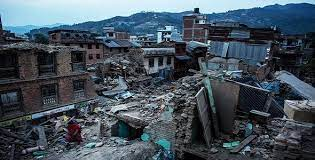
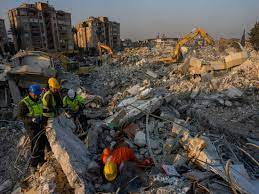
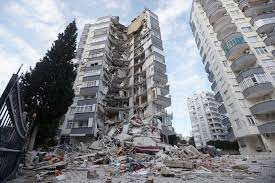

In [59]:
for val in searchVals:  # 각 검색어별로
    crawling_img(val)  # 크롤링

In [42]:
for i in range(1,15):
    print(str(i).zfill(3))

001
002
003
004
005
006
007
008
009
010
011
012
013
014
